## Research question: 


In contrast to the 1918 flu pandemic, Covid-19 can be considered as a “modern” disease, as its high transmission rate and low fatality rate make it incredibly hard to trace. Even though analyses have been drawn from several epidemiological perspectives, we find it particularly compelling to interpret the pandemic from a sociological standpoint. In particular, we want to analyze people’s reactions to the disease in reddit via the pushshift.io reddit API that allows us to perform extensive keyword searching and thus analyze keyword frequencies. Here are some of the initial research questions:
1. Does the keyword frequency of “covid” correlate with the number of covid cases on a daily basis? 
2. The pushshift.io API allows us to search for multiple keywords that appear in the comment section. Does the number of times people talk about political issues in covid discussions correlate with the number of covid cases? Does the trend relate to particular political or social events? 
3. Do people feel sad, depressed, or hopeless about the pandemic? Does the number of times keywords such as "hopeless" increase in covid discussions? 
4. The public policies have changed over time. People were not required to wear masks before May, but were mandated to do so since then. Do people talk more about masks over time in response to health guidance announcements? 
5. A safe, reliable vaccine is the only solution to this outbreak. Do people talk more about vaccinations in recent days, i.e., “vaccine+covid”, as we are getting closer to producing a reliable vaccine? 
6. The death rate of Covid-19 is decreasing. Do the death-related keywords, e.g. “fatality+covid”, correlate with the death rate and the number of covid cases?
7. The number of times a keyword appears in the covid discussion may not be a good indicator of how popular that topic actually is. In fact, we can divide the keyword frequency, e.g. "covid+mask" by the total number of times "covid" appears in the comments. Is the overall trend revealed by this method different from analyzing the raw keyword frequency alone? And what are the implications?

## Date cleaning:
1. Data cleaning on JSON strings retrieved from the Reddit API (the full data collection code can be found in the Appendix)


We cleaned part of the data during the data collection process. First, we created a list of keywords that we want to search and storde in the `KEYWORDS` variable and a `BASE_URL` that each of the keywords is added to. Then, we made API calls to each of the urls, obtained the JSON string, and extracted the number of times a word appears for a given day. After this procedure, we wrote the data to a csv file named by the keyword name (e.g. covid-testing.csv), where the first column is the date, and the second column is the keyword count in the format of “keyword_count”. This procedure saved us time from renaming columns after importing the csv files and thus makes merging multiple datasets very easy.


2. Load csv files to the Notebook
- For reddit data
    - Merge dataframes
    - Convert epoch-style int to datetime object
- For US cases
    - Sort with ascending time order
    - Delete unnecessary columns
    - Convert str to datatime object
- Merge the two dataframes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

Load csv files to Pandas DataFrames.

In [2]:
covid = pd.read_csv("covid.csv")
covid_19 = pd.read_csv("covid-19.csv")
coronavirus = pd.read_csv("coronavirus.csv")
covid_economy = pd.read_csv("covid-economy.csv")
covid_job = pd.read_csv("covid-job.csv")
covid_jobs = pd.read_csv("covid-jobs.csv")
covid_cash = pd.read_csv("covid-cash.csv")
covid_money = pd.read_csv("covid-money.csv")
covid_blm = pd.read_csv("covid-blm.csv")
covid_biden = pd.read_csv("covid-biden.csv")
covid_trump = pd.read_csv("covid-trump.csv")
covid_election = pd.read_csv("covid-election.csv")
covid_china = pd.read_csv("covid-china.csv")
covid_mask = pd.read_csv("covid-mask.csv")
covid_masks = pd.read_csv("covid-masks.csv")
covid_shutdown = pd.read_csv("covid-shutdown.csv")
covid_tests = pd.read_csv("covid-tests.csv")
covid_tested = pd.read_csv("covid-tested.csv")
covid_testing = pd.read_csv("covid-testing.csv")
covid_test = pd.read_csv("covid-test.csv")
covid_sad = pd.read_csv("covid-sad.csv")
covid_depressed = pd.read_csv("covid-depressed.csv")
covid_depressing = pd.read_csv("covid-depressing.csv")
covid_hopeless = pd.read_csv("covid-hopeless.csv")
covid_bored = pd.read_csv("covid-bored.csv")
covid_death = pd.read_csv("covid-death.csv")
covid_fatality = pd.read_csv("covid-fatality.csv")
covid_vaccine = pd.read_csv("covid-vaccine.csv")
covid_vaccines = pd.read_csv("covid-vaccines.csv")

covid_breath = pd.read_csv("covid-breath.csv")
covid_chills = pd.read_csv("covid-chills.csv")
covid_cough = pd.read_csv("covid-cough.csv")
covid_fatigue = pd.read_csv("covid-fatigue.csv")
covid_fever = pd.read_csv("covid-fever.csv")
covid_headache = pd.read_csv("covid-headache.csv")
covid_shortness = pd.read_csv("covid-shortness.csv")
covid_smell = pd.read_csv("covid-smell.csv")
covid_sore = pd.read_csv("covid-sore.csv")
covid_taste = pd.read_csv("covid-taste.csv")

us_case = pd.read_csv("us_case.csv")

An example dataset from the Reddit API.

In [3]:
covid_death.head()

,date,covid_death_count
0,1581379200,17
1,1581465600,25
2,1581552000,53
3,1581638400,45
4,1581724800,50


The dataset from the Covid Tracking Project. 

In [4]:
us_case.head()

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,posNeg,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease
0,2020-10-02,200611.0,835,20612.0,6106.0,1342,30697.0,411751.0,94692886,977186,2348.0,1533.0,0,7294029,49534,2873369.0,56,105964193,1118386
1,2020-10-01,199776.0,847,20492.0,6173.0,1760,30742.0,410409.0,93715700,759865,2334.0,1547.0,0,7244495,45694,2860650.0,56,104845807,899458
2,2020-09-30,198929.0,1061,20390.0,6145.0,1590,30877.0,408649.0,92955835,674267,2319.0,1507.0,0,7198801,44424,2840747.0,56,103946349,790981
3,2020-09-29,197868.0,739,20247.0,6106.0,1733,30391.0,407059.0,92281568,707529,2298.0,1495.0,0,7154377,36947,2813305.0,56,103155368,812773
4,2020-09-28,197129.0,257,20121.0,5981.0,1241,29608.0,405326.0,91574039,919021,2285.0,1518.0,0,7117430,36524,2794608.0,56,102342595,1010138


Merge all reddit Dataframes into a single DataFrame, joining on the "date" column.

In [5]:
list = [covid_19, coronavirus, covid_economy, covid_job, covid_jobs, covid_cash, covid_money, covid_blm, covid_biden, covid_trump, covid_election, covid_china, covid_mask, covid_masks, covid_shutdown, covid_tests, covid_tested, covid_testing, covid_test, covid_sad, covid_depressed, covid_depressing, covid_hopeless, covid_bored, covid_death, covid_fatality, covid_vaccine, covid_vaccines, covid_breath, covid_chills, covid_cough, covid_fatigue, covid_fever, covid_headache, covid_shortness, covid_smell, covid_sore, covid_taste]
reddit = covid
for df in list:
    reddit = pd.merge(reddit, df, on='date')
    
reddit.head()

,date,covid_count,covid-19_count,coronavirus_count,covid_economy_count,covid_job_count,covid_jobs_count,covid_cash_count,covid_money_count,covid_blm_count,...,covid_breath_count,covid_chills_count,covid_cough_count,covid_fatigue_count,covid_fever_count,covid_headache_count,covid_shortness_count,covid_smell_count,covid_sore_count,covid_taste_count
0,1583193600,6455,5381,20437,95,83,18,21,92,1,...,55,13,172,20,178,20,37,3,43,5
1,1583280000,6672,5561,20886,96,96,27,21,113,0,...,65,9,173,21,174,13,40,3,28,5
2,1583366400,7434,6181,21201,116,91,17,24,113,0,...,55,5,172,15,165,14,38,5,32,6
3,1583452800,8186,6732,22031,117,118,30,42,158,0,...,76,17,233,24,221,24,57,2,48,6
4,1583539200,8077,6530,20570,116,92,23,15,120,0,...,68,11,201,12,198,13,51,7,46,8


Convert epoch-style `int` to `datetime` object.

In [6]:
import datetime
reddit.date = pd.to_datetime(reddit.date, unit='s')
reddit.head()

,date,covid_count,covid-19_count,coronavirus_count,covid_economy_count,covid_job_count,covid_jobs_count,covid_cash_count,covid_money_count,covid_blm_count,...,covid_breath_count,covid_chills_count,covid_cough_count,covid_fatigue_count,covid_fever_count,covid_headache_count,covid_shortness_count,covid_smell_count,covid_sore_count,covid_taste_count
0,2020-03-03,6455,5381,20437,95,83,18,21,92,1,...,55,13,172,20,178,20,37,3,43,5
1,2020-03-04,6672,5561,20886,96,96,27,21,113,0,...,65,9,173,21,174,13,40,3,28,5
2,2020-03-05,7434,6181,21201,116,91,17,24,113,0,...,55,5,172,15,165,14,38,5,32,6
3,2020-03-06,8186,6732,22031,117,118,30,42,158,0,...,76,17,233,24,221,24,57,2,48,6
4,2020-03-07,8077,6530,20570,116,92,23,15,120,0,...,68,11,201,12,198,13,51,7,46,8


Since the reddit data is on a daily basis, we want to only keep the columns that both  
1. reveal the daily trend,
2. are trustworthy (not all states keep track of hospitalization and ICU data, so we exclude them).

In [7]:
us_case = us_case[['date', 'totalTestResultsIncrease', 'deathIncrease', 'positiveIncrease']]
us_case.head()

,date,totalTestResultsIncrease,deathIncrease,positiveIncrease
0,2020-10-02,1118386,835,49534
1,2020-10-01,899458,847,45694
2,2020-09-30,790981,1061,44424
3,2020-09-29,812773,739,36947
4,2020-09-28,1010138,257,36524


Rename columns to the underline `_` format.

In [8]:
us_case = us_case.rename(columns={'totalTestResultsIncrease':'total_test_increase','deathIncrease':'death_increase','positiveIncrease':'positive_increase' })
us_case.head()

,date,total_test_increase,death_increase,positive_increase
0,2020-10-02,1118386,835,49534
1,2020-10-01,899458,847,45694
2,2020-09-30,790981,1061,44424
3,2020-09-29,812773,739,36947
4,2020-09-28,1010138,257,36524


Sort `us_case` in chronological order.

In [9]:
us_case = us_case.sort_index(ascending=False).reset_index(drop=True)
us_case.head()

,date,total_test_increase,death_increase,positive_increase
0,2020-01-22,0,0,0
1,2020-01-23,1,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,0,0,0


Convert `str` to `datetime` object.

In [10]:
us_case.date = pd.to_datetime(us_case.date)
us_case.head()

,date,total_test_increase,death_increase,positive_increase
0,2020-01-22,0,0,0
1,2020-01-23,1,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,0,0,0


Merge the reddit and the us_case dataframe.

In [11]:
result = pd.merge(reddit, us_case, on='date')

In [12]:
result.head()

,date,covid_count,covid-19_count,coronavirus_count,covid_economy_count,covid_job_count,covid_jobs_count,covid_cash_count,covid_money_count,covid_blm_count,...,covid_fatigue_count,covid_fever_count,covid_headache_count,covid_shortness_count,covid_smell_count,covid_sore_count,covid_taste_count,total_test_increase,death_increase,positive_increase
0,2020-03-03,6455,5381,20437,95,83,18,21,92,1,...,20,178,20,37,3,43,5,266,3,48
1,2020-03-04,6672,5561,20886,96,96,27,21,113,0,...,21,174,13,40,3,28,5,1119,2,139
2,2020-03-05,7434,6181,21201,116,91,17,24,113,0,...,15,165,14,38,5,32,6,641,4,107
3,2020-03-06,8186,6732,22031,117,118,30,42,158,0,...,24,221,24,57,2,48,6,873,6,112
4,2020-03-07,8077,6530,20570,116,92,23,15,120,0,...,12,198,13,51,7,46,8,919,1,178


## Data descriptions:

Our data mainly comes from two resources: the pushshift.io API, and the Covid Tracking Project. The pushshift.io API is maintained by the /r/datasets mod team to help users better find comments and submissions on reddit. For the purpose of our analysis, we utilize the /comment endpoint which allows us to search for multiple keywords in reddit comments and returns the data in JSON format. We aggregate the search result by day for the last 300 days using attributes `after=300d`, `aggs=created_utc` and `frequency=day`. We don’t want any comment instances to be returned, so we set the return size to be 0. And lastly, we want the data to be returned in ascending, i.e., chronological order, and hence the attribute `sort=asc`. Each returned JSON object contains information about the day (in the format of timestamp) as well as the number of times the keyword(s) appear during the day. 

But JSON is not very handy to put into pandas DataFrames. Therefore, we wrote a Python script that loads and processes the JSON data in batches and wrote the data into csv files with two columns. (A detailed description of how the script works can be found in the _data cleaning section_.) The first column is the word frequency per day; the second is the date. This processing procedure returns very neat datasets. 

Similarly, the Covid Tracking Project is well maintained by a group of volunteers that compiles the covid-19 data on a daily basis. Their goal is to provide “the most complete data available about Covid-19 in the US.” Each row instance represents the Covid-19 data in a single day, and each column contains information about attributes such as daily cases and daily tests. 

## Data limitations: 

1. The data on reddit may be biased. Even though the U.S. has great Internet coverage, only a small percentage of people will actually comment on reddit. Our analyses represent their discussion trend of the covid-19, not the whole population. 

2. When searching for multiple keywords, we limited our search to “covid” and another keyword. We used “covid” instead of the more formal “coronavirus” because we assumed that people would use “covid” more frequently than “coronavirus”. “Coronavirus” is more likely to appear in news releases than in the discussion section. 

3. There may be multiple ways people use to phrase a term. For example, when talking about “covid testing”, people may phrase it as “get tested for covid”, or “the number of covid tests per day.” We are trying to think of as many terms as possible for a keyword that might be phrased differently. But we are not native speakers, and hence may not be able to think the way Americans do. 

4. There are two different endpoints for the reddit API: the comment endpoint, and the submission endpoint. We decided to concentrate on the comment endpoint since this is where most of the discussions occur, even though the two endpoints may yield slightly different results. 

## Exploratory data analysis:

We plot the frequencies of keywords "covid+test", "covid+tests", "covid+tested", "covid+testing". We observe that their trends are similar, so we replace covid_test_count with the sum of the four keywords.

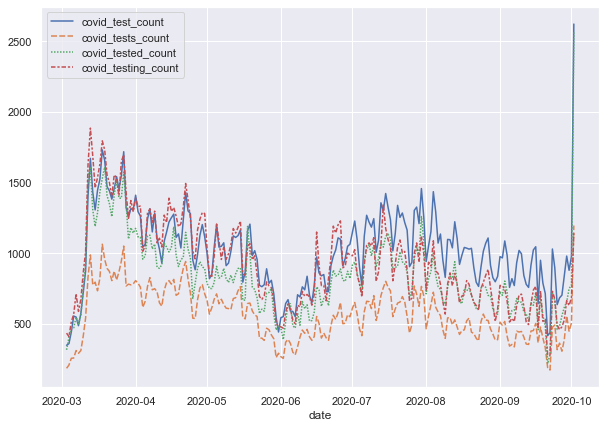

In [13]:
_, ax = plt.subplots(figsize=(10, 7))

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

new_result = result.set_index("date")
sns.lineplot(data=new_result[["covid_test_count", "covid_tests_count", "covid_tested_count", "covid_testing_count"]], ax=ax)

We have also observed similar trends between "covid_mask_count" and "covid_masks_count", so we use their sum to replace the original data for covid_mask_count. 

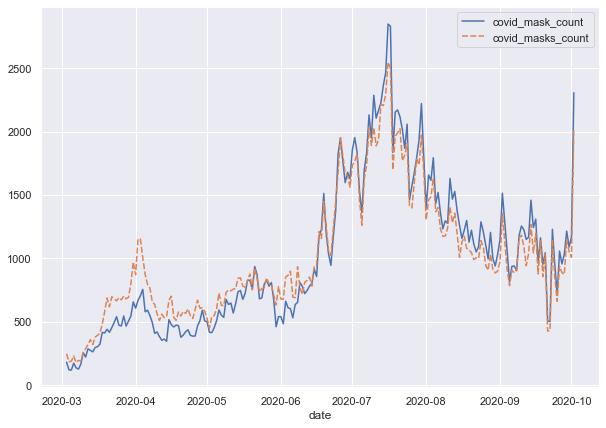

In [14]:
_, ax2 = plt.subplots(figsize=(10, 7))
sns.lineplot(data=new_result[["covid_mask_count", "covid_masks_count"]], ax=ax2)

The same rule applies to "covid_vaccine_count" and "covid_vaccines_count". 

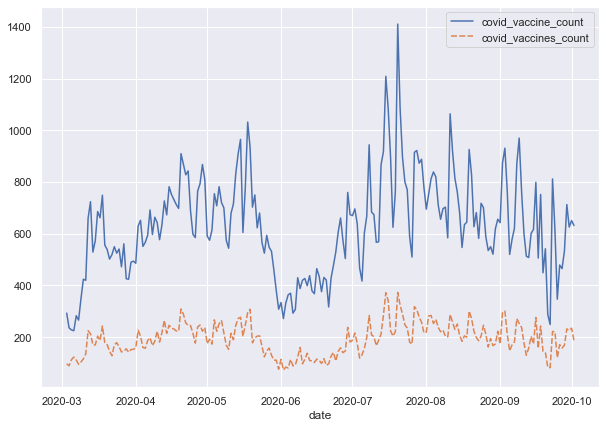

In [15]:
_, ax3 = plt.subplots(figsize=(10, 7))
sns.lineplot(data=new_result[["covid_vaccine_count", "covid_vaccines_count"]], ax=ax3)

Also, "covid_job_count" and "covid_jobs_count". 

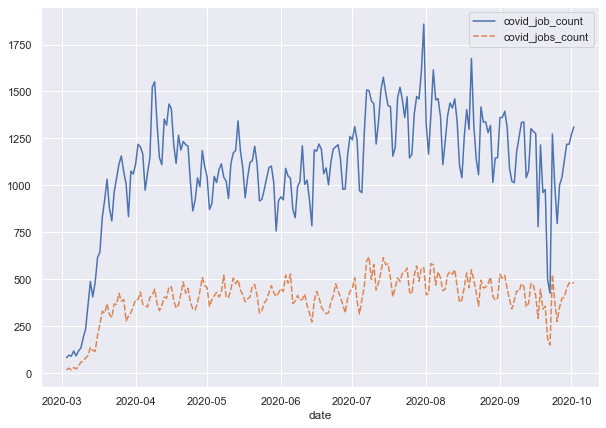

In [16]:
_, ax4 = plt.subplots(figsize=(10, 7))
sns.lineplot(data=new_result[["covid_job_count", "covid_jobs_count"]], ax=ax4)

Adjust the columns of result based on our observation. 

In [17]:
result['covid_job_count'] += result['covid_jobs_count']
result['covid_vaccine_count'] += result['covid_vaccines_count']
result['covid_mask_count'] += result['covid_masks_count']
result['covid_test_count'] += result['covid_tested_count'] + result['covid_testing_count'] + result['covid_tests_count']
result = result.drop(columns = ['covid_vaccines_count', 'covid_jobs_count', 'covid_masks_count', 'covid_tested_count', 'covid_testing_count', 'covid_tests_count'])

Update our reddit dataset to include the most representative columns. 

In [18]:
reddit = result.drop(columns=['total_test_increase', 'death_increase', 'positive_increase'])
reddit.head()

,date,covid_count,covid-19_count,coronavirus_count,covid_economy_count,covid_job_count,covid_cash_count,covid_money_count,covid_blm_count,covid_biden_count,...,covid_breath_count,covid_chills_count,covid_cough_count,covid_fatigue_count,covid_fever_count,covid_headache_count,covid_shortness_count,covid_smell_count,covid_sore_count,covid_taste_count
0,2020-03-03,6455,5381,20437,95,101,21,92,1,20,...,55,13,172,20,178,20,37,3,43,5
1,2020-03-04,6672,5561,20886,96,123,21,113,0,53,...,65,9,173,21,174,13,40,3,28,5
2,2020-03-05,7434,6181,21201,116,108,24,113,0,35,...,55,5,172,15,165,14,38,5,32,6
3,2020-03-06,8186,6732,22031,117,148,42,158,0,31,...,76,17,233,24,221,24,57,2,48,6
4,2020-03-07,8077,6530,20570,116,115,15,120,0,27,...,68,11,201,12,198,13,51,7,46,8


We are also interested in the average frequency of the keywords for the last 300 days. Thus, we calculated the mean for each keyword and created the bar chart below. 

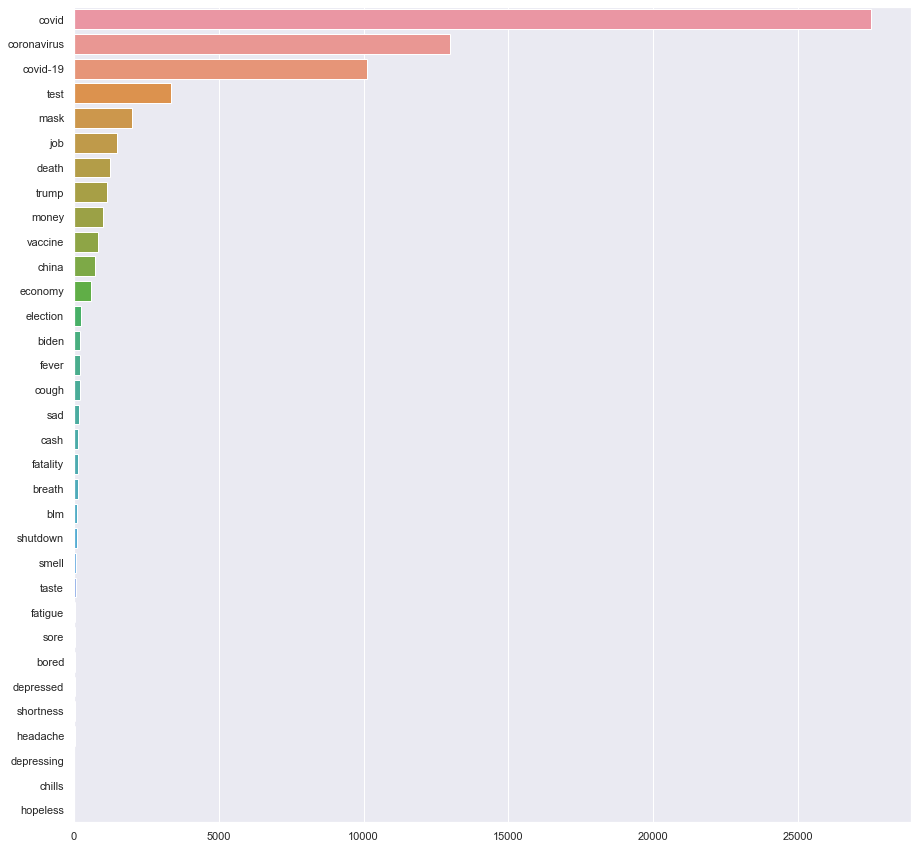

In [19]:
mean_reddit = reddit.iloc[:, 1:].mean().sort_values(ascending=False)
_, ax5 = plt.subplots(figsize=(15, 15))
mean_barplot = sns.barplot(y=mean_reddit.index, x=mean_reddit, orient='h', ax=ax5)
labels = mean_barplot.set_yticklabels(map(lambda x: x.split("_")[1] if len(x.split("_")) == 3 else x.split("_")[0], mean_reddit.index.tolist()))

It's not very easy for us to read off the value for keywords like "chills" and "hopeless", as their mean values are small. Therefore, we decided to drop the first three rows, i.e., "covid", "covid-19", and "coronavirus". The recreated chart demonstrates that the most frequently debated topics about covid-19 are "test", "mask", "job", "death", and "trump".

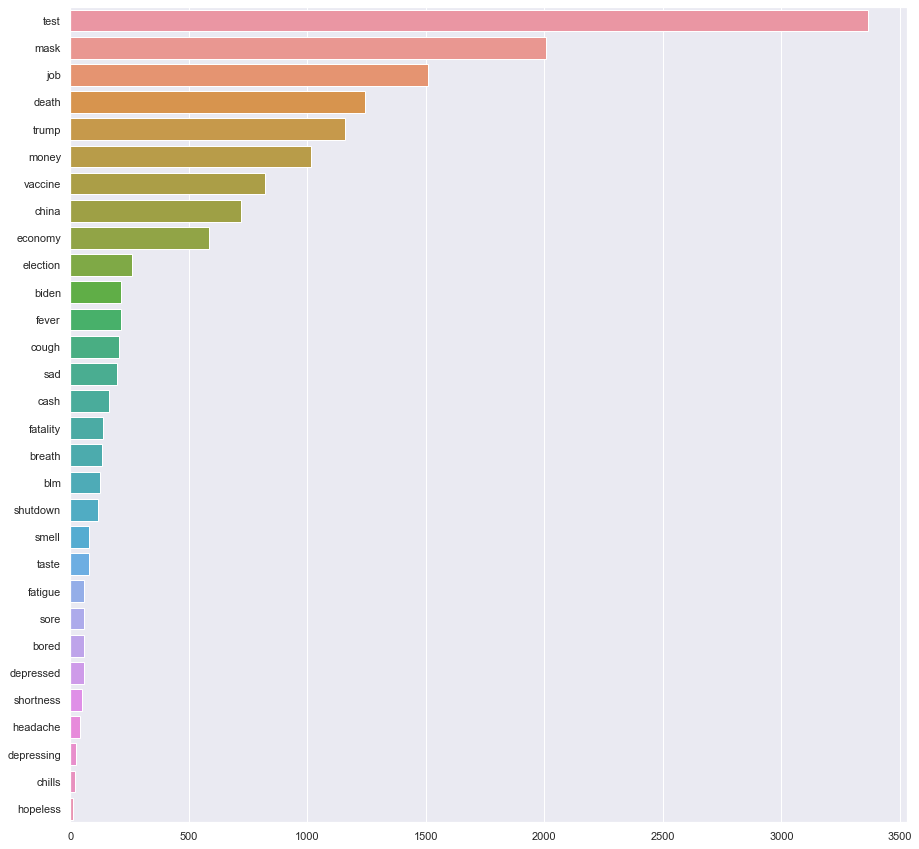

In [20]:
_, ax6 = plt.subplots(figsize=(15, 15))
sub_mean_reddit = mean_reddit.drop(labels=["covid_count", "covid-19_count", "coronavirus_count"])
mean_barplot_2 = sns.barplot(y=sub_mean_reddit.index, x=sub_mean_reddit, orient='h', ax=ax6)
sub_labels = mean_barplot_2.set_yticklabels(map(lambda x: x.split("_")[1] if len(x.split("_")) == 3 else x.split("_")[0], sub_mean_reddit.index.tolist()))

What about the maximum frequency? Is it similar to the mean?

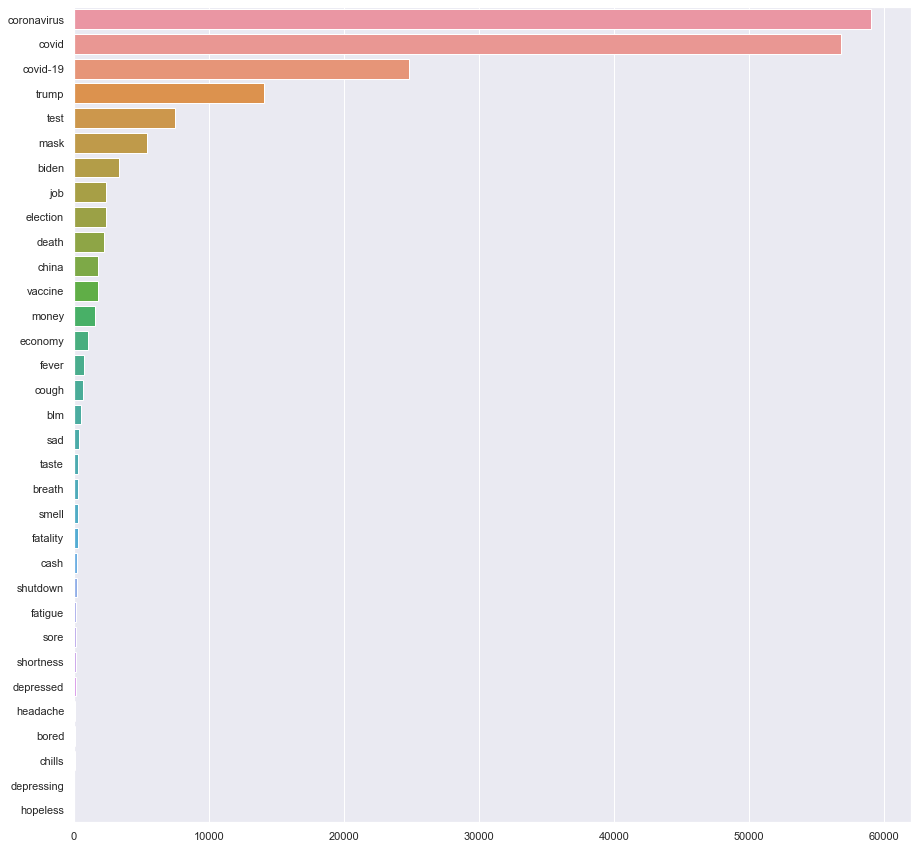

In [21]:
_, ax7 = plt.subplots(figsize=(15, 15))
max_reddit = reddit.set_index('date').max().sort_values(ascending=False)
max_barplot = sns.barplot(y=max_reddit.index, x=max_reddit, orient='h', ax=ax7)
labels = max_barplot.set_yticklabels(map(lambda x: x.split("_")[1] if len(x.split("_")) == 3 else x.split("_")[0], max_reddit.index.tolist()))

Again, we need to drop the first three rows. The maximum frequency bar chart reveals a completely different trend; the leading keywords are "trump", "test", "mask", "biden", and "job".

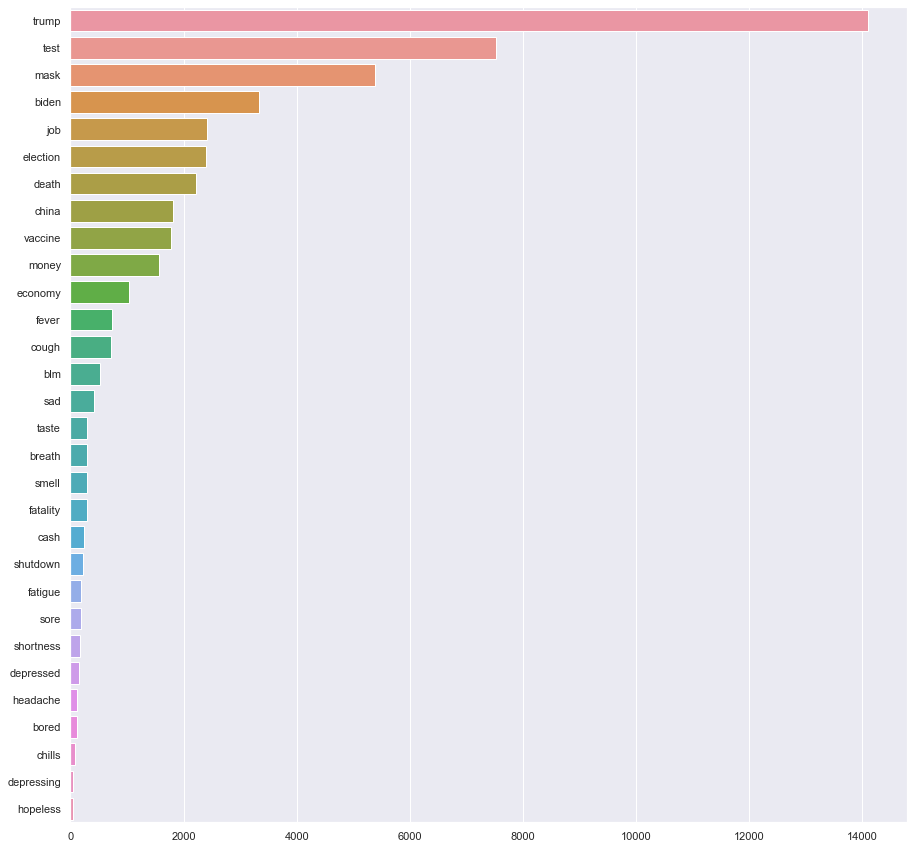

In [22]:
_, ax8 = plt.subplots(figsize=(15, 15))
sub_max_reddit = max_reddit.drop(labels=["covid_count", "covid-19_count", "coronavirus_count"])
sub_max_barplot = sns.barplot(y=sub_max_reddit.index, x=sub_max_reddit, orient='h', ax=ax8)
labels = sub_max_barplot.set_yticklabels(map(lambda x: x.split("_")[1] if len(x.split("_")) == 3 else x.split("_")[0], sub_max_reddit.index.tolist()))

In addition, we are interested in the relationship between reddit comments and covid cases in US.

In [23]:
covid_positive_corr = result.covid_count.corr(result.positive_increase)
print('Standard correlation between daily frequency of "covid" on reddit and daily positive cases is: {:.2f}'.format(covid_positive_corr))
covid_positive_rank_corr = result.covid_count.corr(result.positive_increase, method='spearman')
print('Rank correlation between daily frequency of "covid" on reddit and daily positive cases is: {:.2f}'.format(covid_positive_rank_corr))

Standard correlation between daily frequency of "covid" on reddit and daily positive cases is: 0.46
Rank correlation between daily frequency of "covid" on reddit and daily positive cases is: 0.40


It seems that there is no strong correlation between covid comments on reddit and daily positive cases in US. However, there are a group of outliers roughly at line `y = 0`, and an outlier with a very large covid_count (the day when Trump tested positive for covid). The group of outliers probably represent the scenario in March, where people were starting to have discussions on covid but the number of cases per day were still pretty low. We aim to analyze the effect of excluding these outliers in subsequent phases. 

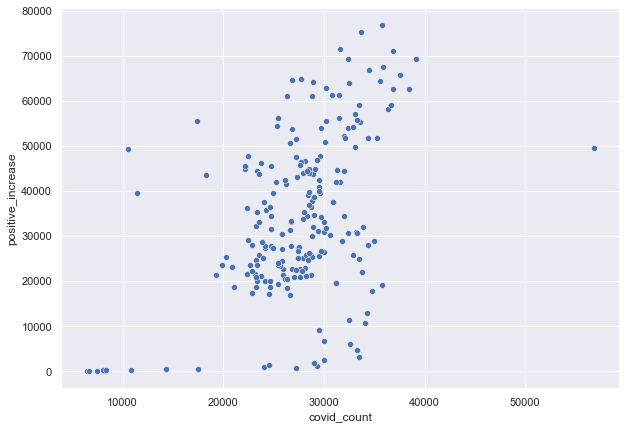

In [24]:
_, ax9 = plt.subplots(figsize=(10, 7))
sns.scatterplot(x=result['covid_count'], y=result['positive_increase'], ax=ax9)

Then what about the relationship between the reddit comments that discuss "death" and daily death rates in US? We first add a death_rate column to the  result DataFrame, which computes the ratio of death_increase over positive_increase each day. Then, we are interested to look at their correlations.

In [25]:
result['death_rate'] = result['death_increase'] / result['positive_increase']
result.head()

,date,covid_count,covid-19_count,coronavirus_count,covid_economy_count,covid_job_count,covid_cash_count,covid_money_count,covid_blm_count,covid_biden_count,...,covid_fever_count,covid_headache_count,covid_shortness_count,covid_smell_count,covid_sore_count,covid_taste_count,total_test_increase,death_increase,positive_increase,death_rate
0,2020-03-03,6455,5381,20437,95,101,21,92,1,20,...,178,20,37,3,43,5,266,3,48,0.062500
1,2020-03-04,6672,5561,20886,96,123,21,113,0,53,...,174,13,40,3,28,5,1119,2,139,0.014388
2,2020-03-05,7434,6181,21201,116,108,24,113,0,35,...,165,14,38,5,32,6,641,4,107,0.037383
3,2020-03-06,8186,6732,22031,117,148,42,158,0,31,...,221,24,57,2,48,6,873,6,112,0.053571
4,2020-03-07,8077,6530,20570,116,115,15,120,0,27,...,198,13,51,7,46,8,919,1,178,0.005618


In [26]:
death_rate_covid_death_corr = result.covid_death_count.corr(result.death_rate)
print('Standard correlation between daily frequency of the keyword "covid+death" and daily death rate is: {:.2f}'.format(death_rate_covid_death_corr))
death_rate_covid_death_rank_corr = result.covid_death_count.corr(result.death_rate, method='spearman')
print('Rank correlation between daily frequency of the keyword "covid+death" and daily death rate is: {:.2f}'.format(death_rate_covid_death_rank_corr))

Standard correlation between daily frequency of the keyword "covid+death" and daily death rate is: 0.45
Rank correlation between daily frequency of the keyword "covid+death" and daily death rate is: 0.39


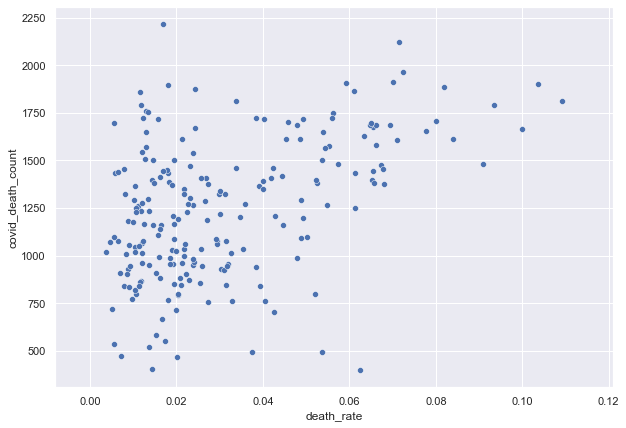

In [27]:
_, ax10 = plt.subplots(figsize=(10, 7))
sns.scatterplot(x=result['death_rate'], y=result['covid_death_count'], ax=ax10)

Even though the correlation between death rate and daily "covid+death" comments are roughly identical to that between daily cases and daily "covid" comments, the correlation pattern here is clearly not as strong. 

## Questions for reviewers: 

1. What other keywords can we think of, in addition to the existing ones?
2. Should we explore the frequency people talk about a covid-related topic at different times of day?

## Appendix:

Below is our data collection code for converting raw json code to formatted csv files.

```python
import json
import urllib.request

KEYWORDS = [
    'covid',
    'covid-19',
    'coronavirus',
    'covid+economy',
    'covid+job',
    'covid+jobs',
    'covid+cash',
    'covid+money',
    'covid+blm',
    'covid+biden',
    'covid+trump',
    'covid+election',
    'covid+china',
    'covid+mask',
    'covid+masks',
    'covid+shutdown',
    'covid+tests',
    'covid+tested',
    'covid+testing',
    'covid+test',
    'covid+sad',
    'covid+depressed',
    'covid+depressing',
    'covid+hopeless',
    'covid+bored',
    'covid+death',
    'covid+fatality',
    'covid+vaccine',
    'covid+vaccines',
    'covid+breath',
    'covid+chills',
    'covid+cough',
    'covid+fatigue',
    'covid+fever',
    'covid+headache',
    'covid+shortness',
    'covid+smell',
    'covid+sore',
    'covid+taste'
]

BASE_URL = 'http://api.pushshift.io/reddit/search/comment/?q={}&after=300d&aggs=created_utc&frequency=day&size=0&sort=asc'

def get_data(base_url, keyword):
    url = base_url.format(keyword)
    data = urllib.request.urlopen(url).read()
    record = data.decode('UTF-8')
    result = json.loads(record)
    result = result.get('aggs').get('created_utc')

    if '+' in keyword:
        file_to_write = keyword.replace('+', '-')
        col_name = keyword.replace('+', '_')
    else:
        file_to_write, col_name = keyword, keyword

    with open(file_to_write + '.csv', 'w+') as f:
        f.write('date,{}\n'.format(col_name + '_count'))
        for line in result:
            f.write(','.join([str(line.get('key')), str(line.get('doc_count'))]))
            f.write('\n')

for keyword in KEYWORDS:
    get_data(BASE_URL, keyword)
```